In [ ]:
# Downloading the Dataset from Kaggle by using opendatasets api
# !pip install opendatasets --upgrade --quiet
# import opendatasets as od

In [ ]:
# download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
# od.download(download_url)

In [1]:
# Import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('us-accidents/US_Accidents_Dec21_updated.csv')
df

In [ ]:
df.columns

In [ ]:
# Splitting Start_Time varible by date and time, 
df[['Date','Time']] = df['Start_Time'].str.split(expand=True)
df

In [ ]:
# Splitting date into month, year and day 
df[['Year', 'Month', 'Day']] = df['Date'].str.split(pat = "-", expand=True) 
df

In [ ]:
# Deleting data from years 2016 and 2017, then counting number of values
# df_final is final dataframe including data from year 2018 to 2021
df_final = df[(df['Year'] != '2016') & (df['Year'] != '2017')]
df_final['Year'].value_counts()

In [ ]:
# Creating databases for variables needed for each question: 
# Q1
q1_df = df_final[['ID','Year']]

# Q2
q2_df = df_final[['ID','Precipitation(in)','Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 'Weather_Condition']]

# Q3
q3_df = df_final[['ID','State', 'City', 'Timezone', 'End_Lat', 'End_Lng','Year']]

# Q4
q4_df = df_final[['ID','Time','Sunrise_Sunset','Year']]

In [ ]:
# drop rows containing missing values for Q1 - Trends of accident before/during pandemic
q1_df_cleaned = q1_df.dropna()
q1_df_cleaned
q1_df_cleaned.to_csv("Q1_Year_data.csv")

In [ ]:
# drop rows containing missing values for Q2 - Effect of environmental factors on the trend of accidents
q2_df_cleaned = q2_df.dropna()
q2_df_cleaned
q2_df_cleaned.to_csv("Q2_Weather_data.csv")

In [ ]:
# drop rows containing missing values for Q3 - Accidents by regions (cities, timezone)
q3_df_cleaned = q3_df.dropna()
q3_df_cleaned
q3_df_cleaned.to_csv("Q3_location_data.csv")

In [ ]:
# drop rows containing missing values for Q4 - Did time of day increase the likelihood of accidents?
q4_df_cleaned = q4_df.dropna()
q4_df_cleaned
q4_df_cleaned.to_csv("Q4_Time_data.csv")

Question 1: Did the number of road traffic accidents increase or decrease during Covid-19 (2020 - 2021) compared to before Covid-19 (2018 - 2019)?

In [ ]:
# Question # 1
# Pie chart
explode = [0, 0, 0.15, 0.15]
q1_df_cleaned["Year"].value_counts().plot(kind="pie", explode = explode, autopct="%1.1f%%")
plt.title("Traffic Accidents by Year", size = 16)
plt.ylabel('')
plt.savefig("Accident_by_year.png", bbox_inches='tight', dpi=300)
plt.show()

Qestion 2: How does environmental variables (visibility, precipitation, and temperature) affect the number of traffic accidents before and during Covid-19?

Question 3: How did US traffic accidents trend change before and during Covid-19 in different regions (cities and timezones)?

In [2]:
# Question # 3 - Accident trends by region (cities and timezones)
# load location data
location_df = pd.read_csv('Q3_location_data.csv')
location_df.head()

,Unnamed: 0,ID,State,City,Timezone,End_Lat,End_Lng,Year
0,224945,A-224946,MA,East Boston,US/Eastern,42.383346,-71.021204,2021
1,224946,A-224947,CA,Salyer,US/Pacific,40.904856,-123.740056,2021
2,224947,A-224948,MD,Bethesda,US/Eastern,38.973149,-77.121876,2021
3,224948,A-224949,WA,Seattle,US/Pacific,47.643411,-122.308460,2021
4,224949,A-224950,CA,Mountain View,US/Pacific,37.410966,-122.076087,2021


In [3]:
# subset location data pre-covid data
df_prepan = location_df.loc[(location_df['Year'] <= 2019)]
df_prepan

# Subset location data after covid started
df_pan =location_df.loc[(location_df['Year'] > 2019)]
df_pan

,Unnamed: 0,ID,State,City,Timezone,End_Lat,End_Lng,Year
0,224945,A-224946,MA,East Boston,US/Eastern,42.383346,-71.021204,2021
1,224946,A-224947,CA,Salyer,US/Pacific,40.904856,-123.740056,2021
2,224947,A-224948,MD,Bethesda,US/Eastern,38.973149,-77.121876,2021
3,224948,A-224949,WA,Seattle,US/Pacific,47.643411,-122.308460,2021
4,224949,A-224950,CA,Mountain View,US/Pacific,37.410966,-122.076087,2021
...,...,...,...,...,...,...,...,...
2135238,2362657,A-2362658,CA,Mission Hills,US/Pacific,34.265778,-118.454289,2020
2135239,2362658,A-2362659,CA,Lost Hills,US/Pacific,35.736667,-119.742500,2020
2135240,2362659,A-2362660,CA,Los Angeles,US/Pacific,34.075263,-118.281157,2020
2145522,2372960,A-2372961,MI,Detroit,US/Eastern,42.312500,-83.094120,2020


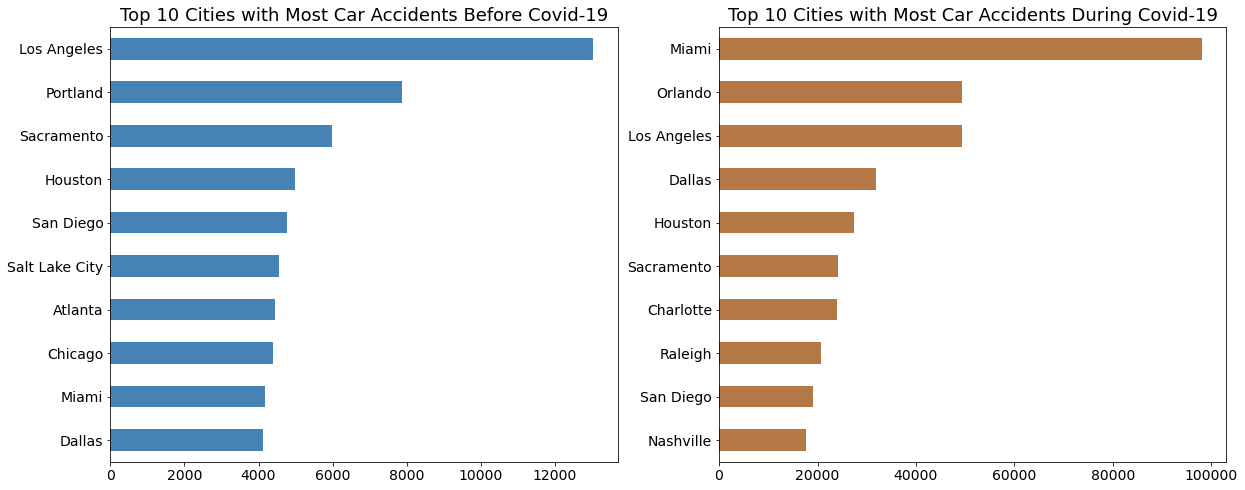

In [4]:
# Plot the top 10 cities with the most accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

# Top 10 cities with most car accidents pre-covid
df_prepan['City'].value_counts()[:10].plot.barh(fontsize = 14, color='#4682B4', ax = ax1).invert_yaxis()
ax1.set_title('Top 10 Cities with Most Car Accidents Before Covid-19', fontsize = 18)

# Top 10 cities with most car accidents after-covid
df_pan['City'].value_counts()[:10].plot.barh(fontsize = 14, color='#B47846', ax = ax2).invert_yaxis()
ax2.set_title('Top 10 Cities with Most Car Accidents During Covid-19', fontsize = 18)

plt.show()

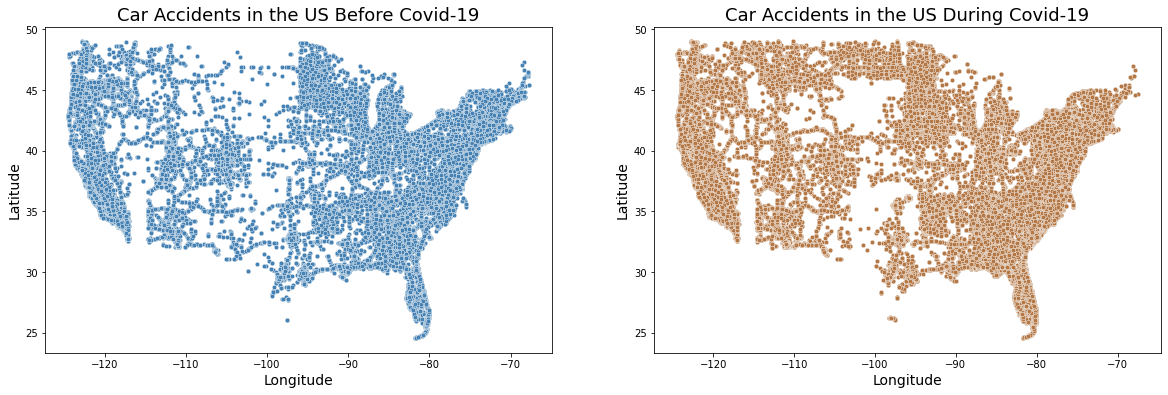

In [5]:
# Maps of car accidents pre vs during covid
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
# pre-covid
sns.scatterplot(x= df_prepan.End_Lng, y=df_prepan.End_Lat , color='#4682B4', s=20, ax=ax1)
ax1.set_title('Car Accidents in the US Before Covid-19', fontsize = 18)
ax1.set_xlabel("Longitude", fontsize = 14)
ax1.set_ylabel("Latitude", fontsize = 14)
# after covid
sns.scatterplot(x= df_pan.End_Lng, y=df_pan.End_Lat , color='#B47846', s=20, ax = ax2)
ax2.set_title('Car Accidents in the US During Covid-19', fontsize = 18)
ax2.set_xlabel("Longitude", fontsize = 14)
ax2.set_ylabel("Latitude", fontsize = 14)

plt.show()

In [6]:
# Plot accidents by different timezones
# Count number of accidents for each timezone before covid
timezone_pre = pd.DataFrame(df_prepan.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"Pre_covid_Cases"})
timezone_pre

# Count number of accidents for each timezone after covid
timezone_pan = pd.DataFrame(df_pan.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"During_covid_Cases"})
timezone_pan

# merge the two dataframes
accidents_by_timezone = pd.merge(timezone_pre, timezone_pan, on="Timezone")
accidents_by_timezone

,Timezone,Pre_covid_Cases,During_covid_Cases
0,US/Pacific,200668,684986
1,US/Eastern,118087,980692
2,US/Central,64079,356706
3,US/Mountain,37884,112753


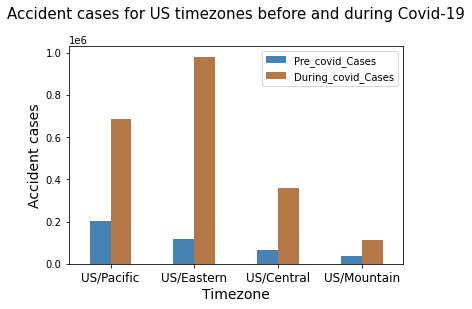

In [7]:
# Plot accidents by timezone
accidents_by_timezone.plot(x="Timezone", y = ["Pre_covid_Cases", "During_covid_Cases"], kind = "bar",
                          color=['#4682B4', '#B47846'])
plt.xticks(rotation = 0, size=12)
plt.xlabel("Timezone", size = 14)
plt.ylabel("Accident cases", size = 14)
plt.title("Accident cases for US timezones before and during Covid-19", size = 15, x=0.5, y=1.1)
plt.savefig("Accident_by_timezones.png", bbox_inches='tight', dpi=300)
plt.show()

Question 4: Are traffic accidents more likely to happend in the day time or night time and is there any difference in the patterns before and during Covid-19?

In [ ]:
# Question # 4 - Effects of time of the day on the number of accidents
#Get count of day time accidents before Covid (2018-2019)
columns = ["ID", "Time", "Sunrise_Sunset", "Year"]
day_df = q4_df.loc[q4_df["Sunrise_Sunset"] == "Day", columns]
day_df

In [ ]:
# Pre-Covid daytime dataframe
precov_day_df = day_df[(day_df['Year'] != '2020') & (day_df['Year'] != '2021')]
precov_day_df.describe()

In [ ]:
#Get count of night time accidents before Covid (2018-2019)
columns = ["ID", "Time", "Sunrise_Sunset", "Year"]
night_df = q4_df.loc[q4_df["Sunrise_Sunset"] == "Night", columns]
night_df

In [ ]:
# Pre-Covid night time dataframe
precov_night_df = night_df[(night_df['Year'] != '2020') & (night_df['Year'] != '2021')]
precov_night_df.describe()


In [ ]:
#Get count of day time accidents during Covid (2020-2021)
durcov_day_df = day_df[(day_df['Year'] != '2018') & (day_df['Year'] != '2019')]
durcov_day_df.describe()

In [ ]:
#Get count of night time accidents during Covid (2020-2021)
durcov_night_df = night_df[(night_df['Year'] != '2018') & (night_df['Year'] != '2019')]
durcov_night_df.describe()

In [ ]:
precov_day_df

In [ ]:
# SHOW FINDINGS VISUALLY
#Plot number of daytime acccidents (ID) pre-covid vs. during covid
# precov_day_incidents = precov_day_df['ID'].value_counts().plot()
# durcov_day_incidents = durcov_day_df['ID'].value_counts()
# plt.bar(durcov_day_incidents, precov_day_incidents)
# plt.xlabel("During Covid: Day Time Incidents")
# plt.ylabel("Pre-Covid: Day Time Incidents")
# plt.show()

precov_day_df['ID'].value_counts().plot(kind="bar")